# **Diffusion Model in Causal Inference with Unmeasured Confounders**
## **Tatsuhiro Shimizu**
## ***AI Lab, CyberAgent Tokyo, Japan***
## **0009-0009-9746-3346**

This is the code for the Example 10. in the main text.
The following image is the SCM that we implement.

- <font color='red'>Unobserved nodes: $X_1, X_4$</font>
- Cause node: $X_2$
- Outcome node: $X_5$
- Node that satisfies the backdoor criterion for a pair $(X_2, X_5)$: $X_3$


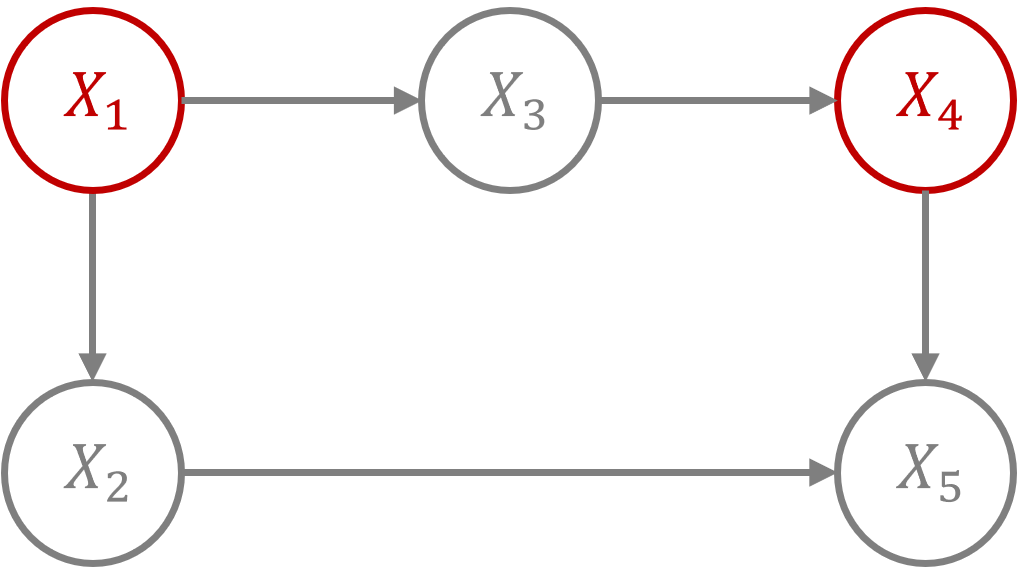

Define
- the number of observation: n_obs = 1000 (same environment as the DCM paper)
- the number of samples from DCM and BDCM: n_sample_DCM = 500 (same environment as the DCM paper)

In [1]:
%reload_ext autoreload
%autoreload 2

## DCM Training

Define
- time: $T = 100$
- noise schedule: $\beta_t$ and $\alpha_t$ for all $i = 1, \cdots, T$

Define
- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = X_1^2 + U_2$
  - $X_3 = 2X_1 + U_3$
  - $X_4 = X_3 + U_4$
  - $X_5 = X_2 + 2X_4 + U_5$
- number of internvened values
- intervened values

Sample
- exogeneous nodes: $U_1, U_2, U_3, U_4, U_5 \sim \mathcal{N}(0, 1)$
- endogenous nodes: $X_1, X_2, X_3, X_4, X_5$
- intervened nodes: $X_5|do(X_2 = x_2)$
- time: $t \sim \mathcal{N}(0, 1)$
- noise: $\epsilon \sim \mathcal{N}(0, 1)$


Define
- epoch: num_epochs = 500
- batch size: batch_size = 64
- learning rate: learning_rate $\eta$ = 0.0001

Neural Network: 3 hidden layers
- 1st layer: 128 nodes
- 2nd layer: 256 nodes
- 3rd layer: 256 nodes

Train the Neural Network

Plot the loss of the training over the epoch

In [2]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM1 import SCM1


  0%|          | 0/2 [00:00<?, ?it/s]

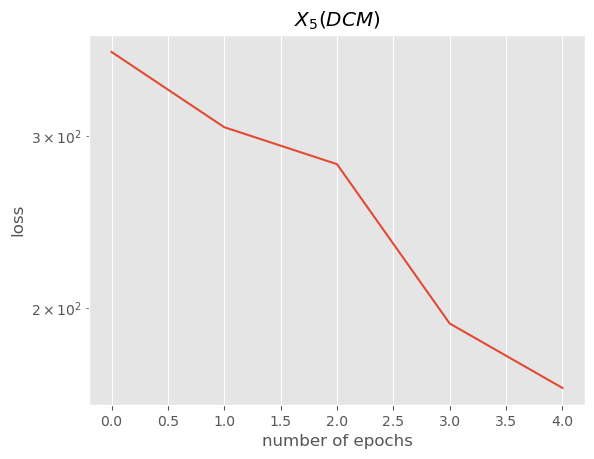

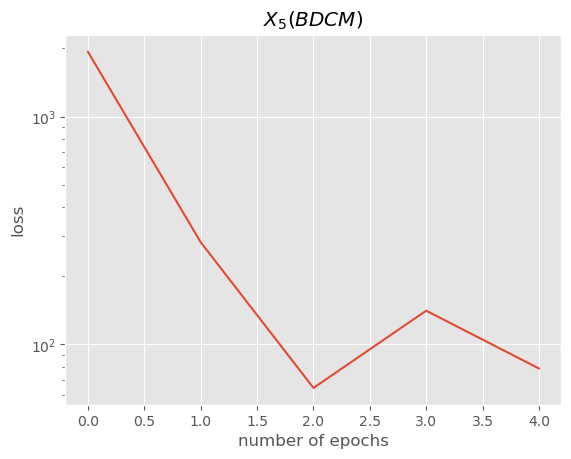

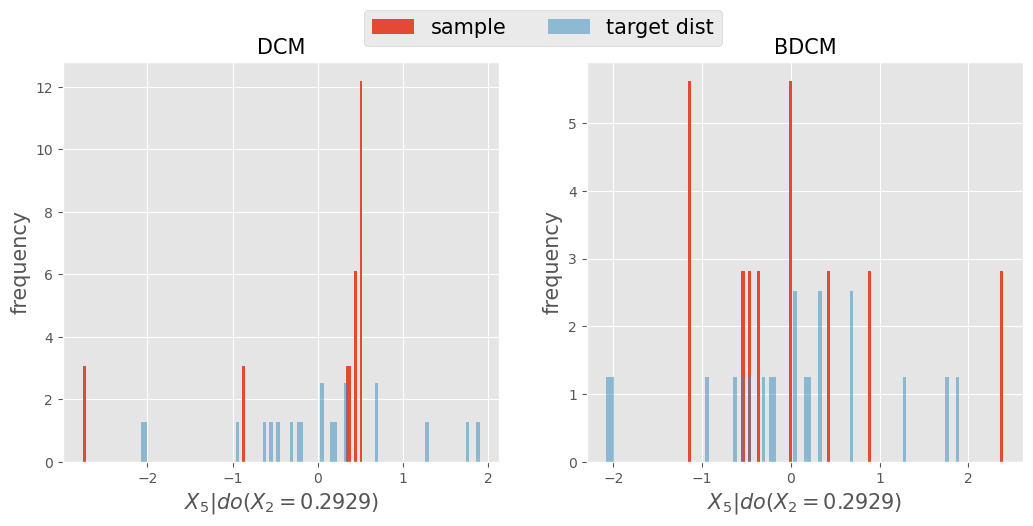

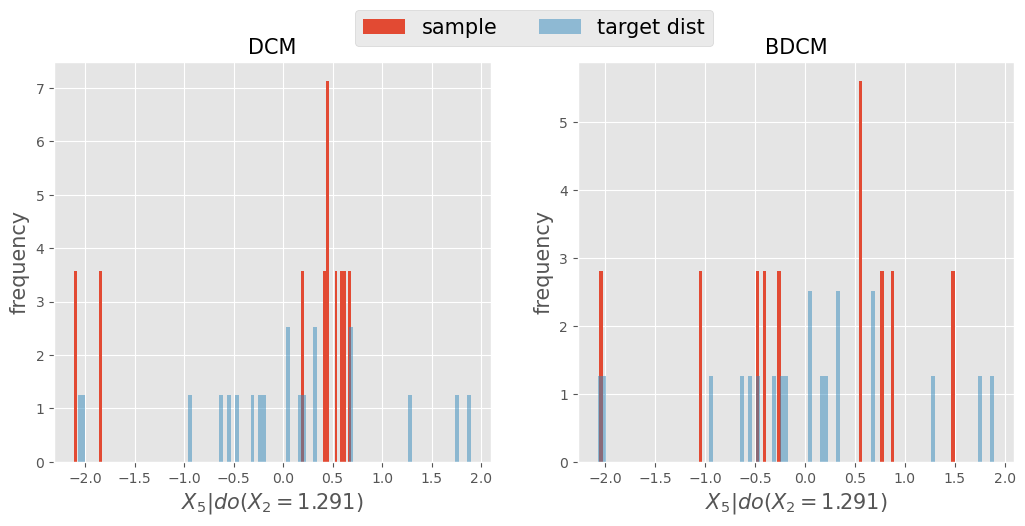

 50%|█████     | 1/2 [00:01<00:01,  1.23s/it]

mean of MMD for DCM: 0.00194
standard deviation of MMD for DCM: 0.000207
mean of MMD for BDCM: 0.00347
standard deviation of MMD for BDCM: 0.00137


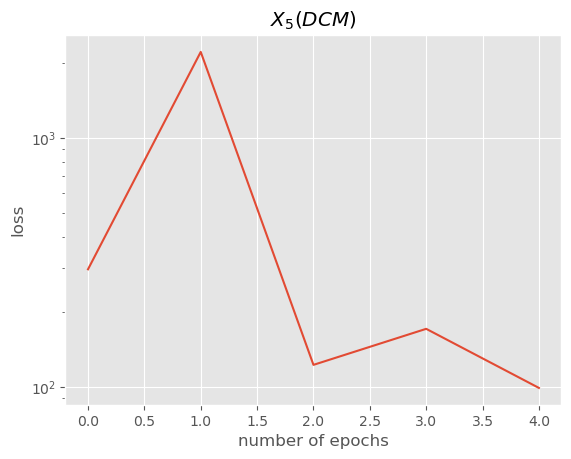

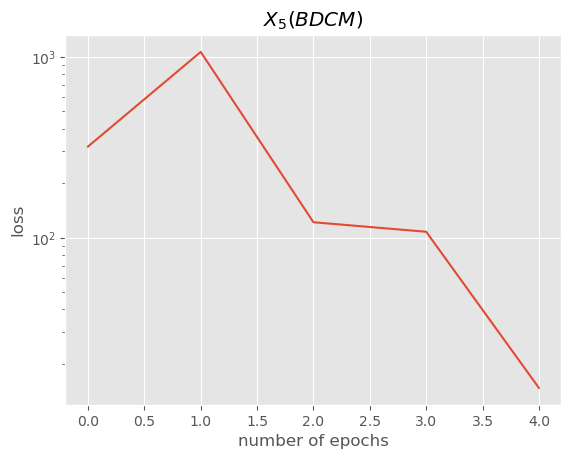

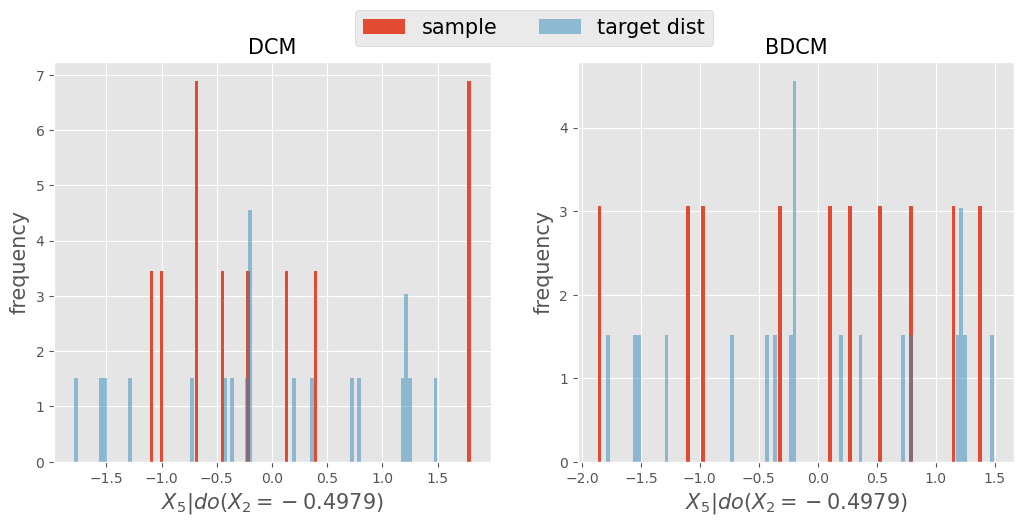

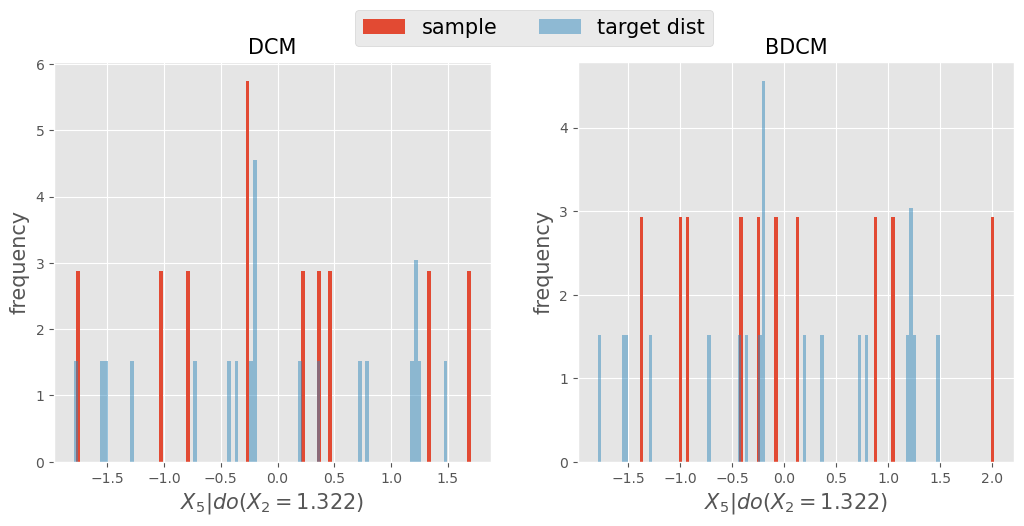

100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

mean of MMD for DCM: 0.00363
standard deviation of MMD for DCM: 0.000879
mean of MMD for BDCM: 0.00293
standard deviation of MMD for BDCM: 0.000815
mean of all MMD for DCM: 0.00278
standard deviation of all MMD for DCM: 0.00106
mean of all MMD for BDCM: 0.0032
standard deviation of all MMD for BDCM: 0.00116


In [3]:
def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = x[0] ** 2+ u
  elif ind == 2:
    output = 2 * x[0] + u
  elif ind == 3:
    output = x[2] + u
  elif ind == 4:
    output = x[1] + 2 * x[3] + u
  return normalize(output)

SCM1(structural_eq=structural_eq, simple_or_complex = "simple")